In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

/future/u/alexder/anaconda3/envs/cs356v2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

batch_size = 4

trainset = torchvision.datasets.MNIST(root = '../../../datasets/mnist', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root = '../../../datasets/mnist', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

/future/u/alexder/anaconda3/envs/cs356v2/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /opt/conda/conda-bld/pytorch_1623448238472/work/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


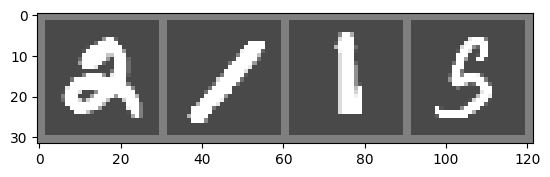

2     1     1     5    


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = torchvision.models.resnet18(num_classes = 10)
net.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [6]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        outputs_vals = torch.argmax(outputs, dim = 1)
        print(labels)
        print(outputs_vals)
        loss.backward()
        print(loss)
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

tensor([8, 7, 7, 2])
tensor([6, 9, 5, 2])
tensor(1.6290, grad_fn=<NllLossBackward>)
tensor([1, 3, 3, 0])
tensor([9, 5, 2, 0])
tensor(2.3603, grad_fn=<NllLossBackward>)
tensor([9, 2, 4, 1])
tensor([6, 8, 5, 7])
tensor(3.0877, grad_fn=<NllLossBackward>)
tensor([9, 7, 4, 0])
tensor([8, 5, 2, 0])
tensor(1.6764, grad_fn=<NllLossBackward>)
tensor([7, 0, 2, 5])
tensor([7, 5, 2, 8])
tensor(1.5757, grad_fn=<NllLossBackward>)
tensor([7, 3, 4, 0])
tensor([7, 9, 3, 0])
tensor(1.8682, grad_fn=<NllLossBackward>)
tensor([0, 5, 8, 1])
tensor([0, 7, 2, 7])
tensor(1.9538, grad_fn=<NllLossBackward>)
tensor([7, 0, 5, 3])
tensor([7, 0, 7, 3])
tensor(1.2092, grad_fn=<NllLossBackward>)
tensor([6, 4, 7, 5])
tensor([2, 4, 7, 0])
tensor(1.4838, grad_fn=<NllLossBackward>)
tensor([0, 5, 4, 5])
tensor([0, 0, 7, 3])
tensor(1.5983, grad_fn=<NllLossBackward>)
tensor([2, 8, 2, 0])
tensor([3, 5, 7, 0])
tensor(2.3987, grad_fn=<NllLossBackward>)
tensor([6, 5, 6, 6])
tensor([5, 0, 1, 3])
tensor(4.0612, grad_fn=<NllLossBac

tensor(0.8794, grad_fn=<NllLossBackward>)
tensor([3, 2, 2, 0])
tensor([9, 2, 9, 0])
tensor(1.2763, grad_fn=<NllLossBackward>)
tensor([8, 1, 9, 5])
tensor([3, 1, 9, 5])
tensor(1.0428, grad_fn=<NllLossBackward>)
tensor([4, 5, 4, 7])
tensor([9, 5, 6, 7])
tensor(1.9373, grad_fn=<NllLossBackward>)
tensor([1, 2, 8, 0])
tensor([1, 2, 3, 7])
tensor(1.2509, grad_fn=<NllLossBackward>)
tensor([7, 1, 9, 1])
tensor([7, 2, 9, 1])
tensor(0.8760, grad_fn=<NllLossBackward>)
tensor([1, 0, 0, 6])
tensor([1, 0, 7, 9])
tensor(1.5043, grad_fn=<NllLossBackward>)
tensor([4, 1, 7, 5])
tensor([4, 1, 3, 5])
tensor(1.0338, grad_fn=<NllLossBackward>)
tensor([3, 1, 5, 3])
tensor([2, 1, 5, 3])
tensor(0.8695, grad_fn=<NllLossBackward>)
tensor([3, 4, 4, 8])
tensor([2, 9, 7, 1])
tensor(3.0241, grad_fn=<NllLossBackward>)
tensor([8, 1, 2, 9])
tensor([5, 1, 2, 9])
tensor(0.5023, grad_fn=<NllLossBackward>)
tensor([0, 6, 4, 6])
tensor([0, 3, 4, 9])
tensor(1.5975, grad_fn=<NllLossBackward>)
tensor([4, 2, 7, 8])
tensor([4, 2,

tensor([5, 7, 2, 6])
tensor(1.2416, grad_fn=<NllLossBackward>)
tensor([0, 1, 3, 4])
tensor([0, 1, 3, 4])
tensor(0.2746, grad_fn=<NllLossBackward>)
tensor([5, 7, 3, 0])
tensor([8, 7, 2, 0])
tensor(1.2139, grad_fn=<NllLossBackward>)
tensor([3, 9, 3, 9])
tensor([3, 4, 2, 4])
tensor(2.5534, grad_fn=<NllLossBackward>)
tensor([7, 6, 6, 7])
tensor([1, 6, 6, 7])
tensor(0.7795, grad_fn=<NllLossBackward>)
tensor([5, 4, 4, 3])
tensor([3, 4, 7, 1])
tensor(1.4874, grad_fn=<NllLossBackward>)
tensor([3, 1, 3, 9])
tensor([8, 1, 3, 7])
tensor(1.3601, grad_fn=<NllLossBackward>)
tensor([0, 0, 1, 4])
tensor([6, 0, 1, 4])
tensor(0.9086, grad_fn=<NllLossBackward>)
tensor([1, 6, 3, 3])
tensor([1, 6, 5, 3])
tensor(0.7976, grad_fn=<NllLossBackward>)
tensor([6, 1, 8, 4])
tensor([6, 1, 3, 7])
tensor(2.0888, grad_fn=<NllLossBackward>)
tensor([3, 5, 3, 3])
tensor([0, 9, 1, 3])
tensor(1.9489, grad_fn=<NllLossBackward>)
tensor([0, 6, 6, 8])
tensor([0, 4, 9, 8])
tensor(1.2643, grad_fn=<NllLossBackward>)
tensor([4, 8,

tensor(0.1679, grad_fn=<NllLossBackward>)
tensor([3, 1, 1, 2])
tensor([3, 4, 0, 6])
tensor(1.6039, grad_fn=<NllLossBackward>)
tensor([1, 1, 6, 0])
tensor([1, 5, 8, 0])
tensor(1.5400, grad_fn=<NllLossBackward>)
tensor([0, 3, 4, 2])
tensor([0, 3, 4, 2])
tensor(0.1938, grad_fn=<NllLossBackward>)
tensor([6, 7, 2, 3])
tensor([5, 7, 2, 3])
tensor(0.7591, grad_fn=<NllLossBackward>)
tensor([9, 2, 0, 0])
tensor([4, 1, 0, 3])
tensor(1.3608, grad_fn=<NllLossBackward>)
tensor([3, 1, 9, 1])
tensor([3, 1, 4, 1])
tensor(1.1243, grad_fn=<NllLossBackward>)
tensor([9, 0, 3, 2])
tensor([9, 0, 3, 2])
tensor(0.3275, grad_fn=<NllLossBackward>)
tensor([8, 9, 3, 9])
tensor([8, 9, 2, 1])
tensor(1.6890, grad_fn=<NllLossBackward>)
tensor([3, 4, 5, 3])
tensor([3, 4, 5, 2])
tensor(0.6834, grad_fn=<NllLossBackward>)
tensor([8, 1, 1, 7])
tensor([6, 1, 1, 0])
tensor(0.9187, grad_fn=<NllLossBackward>)
tensor([0, 1, 7, 9])
tensor([0, 1, 2, 9])
tensor(1.7071, grad_fn=<NllLossBackward>)
tensor([3, 6, 7, 8])
tensor([3, 6,

tensor(0.2090, grad_fn=<NllLossBackward>)
tensor([0, 3, 8, 0])
tensor([0, 3, 4, 6])
tensor(1.2498, grad_fn=<NllLossBackward>)
tensor([8, 8, 8, 0])
tensor([4, 3, 4, 0])
tensor(2.3985, grad_fn=<NllLossBackward>)
tensor([0, 5, 9, 9])
tensor([0, 5, 8, 7])
tensor(0.6969, grad_fn=<NllLossBackward>)
tensor([8, 0, 7, 9])
tensor([5, 0, 7, 4])
tensor(0.9937, grad_fn=<NllLossBackward>)
tensor([1, 8, 4, 9])
tensor([1, 8, 9, 9])
tensor(0.5088, grad_fn=<NllLossBackward>)
tensor([8, 2, 8, 4])
tensor([9, 2, 8, 4])
tensor(1.2589, grad_fn=<NllLossBackward>)
tensor([9, 4, 1, 6])
tensor([9, 0, 1, 6])
tensor(0.6480, grad_fn=<NllLossBackward>)
tensor([6, 1, 4, 3])
tensor([6, 9, 4, 8])
tensor(0.9587, grad_fn=<NllLossBackward>)
tensor([2, 4, 8, 8])
tensor([3, 4, 9, 8])
tensor(1.2527, grad_fn=<NllLossBackward>)
tensor([9, 8, 8, 3])
tensor([9, 8, 4, 3])
tensor(0.8686, grad_fn=<NllLossBackward>)
tensor([4, 3, 2, 9])
tensor([4, 8, 8, 8])
tensor(1.1467, grad_fn=<NllLossBackward>)
tensor([0, 9, 8, 5])
tensor([0, 9,

tensor(0.1936, grad_fn=<NllLossBackward>)
tensor([3, 6, 5, 4])
tensor([3, 6, 5, 4])
tensor(0.0933, grad_fn=<NllLossBackward>)
tensor([6, 2, 4, 4])
tensor([6, 8, 4, 3])
tensor(2.1869, grad_fn=<NllLossBackward>)
tensor([1, 8, 5, 3])
tensor([1, 8, 5, 3])
tensor(0.0784, grad_fn=<NllLossBackward>)
tensor([1, 3, 3, 7])
tensor([1, 3, 3, 7])
tensor(0.2138, grad_fn=<NllLossBackward>)
tensor([0, 8, 8, 3])
tensor([0, 5, 8, 3])
tensor(1.2345, grad_fn=<NllLossBackward>)
tensor([3, 8, 4, 1])
tensor([3, 8, 4, 1])
tensor(0.1183, grad_fn=<NllLossBackward>)
tensor([8, 2, 2, 1])
tensor([5, 2, 2, 1])
tensor(0.4204, grad_fn=<NllLossBackward>)
tensor([6, 8, 1, 5])
tensor([6, 8, 1, 5])
tensor(0.2693, grad_fn=<NllLossBackward>)
tensor([6, 2, 6, 6])
tensor([0, 2, 6, 6])
tensor(1.3719, grad_fn=<NllLossBackward>)
tensor([1, 7, 3, 5])
tensor([1, 7, 3, 5])
tensor(0.3011, grad_fn=<NllLossBackward>)
tensor([9, 4, 1, 2])
tensor([9, 4, 1, 2])
tensor(0.1186, grad_fn=<NllLossBackward>)
tensor([3, 4, 6, 5])
tensor([3, 4,

tensor(0.5355, grad_fn=<NllLossBackward>)
tensor([9, 6, 4, 2])
tensor([9, 0, 4, 2])
tensor(0.9177, grad_fn=<NllLossBackward>)
tensor([7, 5, 7, 6])
tensor([1, 5, 2, 6])
tensor(1.2820, grad_fn=<NllLossBackward>)
tensor([8, 3, 3, 9])
tensor([6, 6, 3, 9])
tensor(1.8788, grad_fn=<NllLossBackward>)
tensor([4, 2, 4, 5])
tensor([6, 2, 4, 5])
tensor(0.5854, grad_fn=<NllLossBackward>)
tensor([6, 6, 2, 8])
tensor([6, 6, 2, 5])
tensor(0.6025, grad_fn=<NllLossBackward>)
tensor([2, 6, 2, 9])
tensor([2, 6, 3, 9])
tensor(0.6315, grad_fn=<NllLossBackward>)
tensor([7, 3, 6, 4])
tensor([7, 3, 6, 4])
tensor(0.0829, grad_fn=<NllLossBackward>)
tensor([9, 1, 7, 5])
tensor([9, 2, 7, 5])
tensor(0.6797, grad_fn=<NllLossBackward>)
tensor([0, 3, 3, 5])
tensor([0, 8, 3, 5])
tensor(0.4040, grad_fn=<NllLossBackward>)
tensor([0, 4, 8, 4])
tensor([0, 4, 8, 7])
tensor(0.7418, grad_fn=<NllLossBackward>)
tensor([4, 6, 0, 0])
tensor([4, 6, 5, 0])
tensor(1.5789, grad_fn=<NllLossBackward>)
tensor([3, 2, 9, 3])
tensor([3, 2,

tensor(0.8207, grad_fn=<NllLossBackward>)
tensor([2, 3, 0, 4])
tensor([2, 5, 0, 4])
tensor(0.5467, grad_fn=<NllLossBackward>)
tensor([3, 1, 1, 8])
tensor([3, 9, 0, 8])
tensor(0.9365, grad_fn=<NllLossBackward>)
tensor([0, 0, 4, 5])
tensor([0, 0, 4, 5])
tensor(0.0976, grad_fn=<NllLossBackward>)
tensor([2, 9, 6, 7])
tensor([1, 9, 6, 7])
tensor(1.3295, grad_fn=<NllLossBackward>)
tensor([2, 8, 0, 0])
tensor([2, 8, 9, 0])
tensor(0.7331, grad_fn=<NllLossBackward>)
tensor([2, 5, 1, 9])
tensor([2, 6, 1, 9])
tensor(0.3711, grad_fn=<NllLossBackward>)
tensor([4, 3, 1, 5])
tensor([4, 3, 1, 5])
tensor(0.2301, grad_fn=<NllLossBackward>)
tensor([1, 6, 5, 3])
tensor([1, 6, 5, 3])
tensor(0.2772, grad_fn=<NllLossBackward>)
tensor([5, 2, 2, 7])
tensor([5, 2, 6, 9])
tensor(0.9466, grad_fn=<NllLossBackward>)
tensor([8, 5, 7, 3])
tensor([8, 6, 7, 3])
tensor(0.8484, grad_fn=<NllLossBackward>)
tensor([3, 2, 8, 0])
tensor([3, 2, 8, 0])
tensor(0.0077, grad_fn=<NllLossBackward>)
tensor([5, 4, 5, 3])
tensor([1, 6,

tensor([7, 8, 8, 0])
tensor([7, 8, 1, 0])
tensor(0.4381, grad_fn=<NllLossBackward>)
tensor([8, 4, 8, 7])
tensor([8, 9, 8, 7])
tensor(0.4921, grad_fn=<NllLossBackward>)
tensor([4, 1, 8, 8])
tensor([4, 1, 3, 8])
tensor(0.6379, grad_fn=<NllLossBackward>)
tensor([6, 4, 1, 4])
tensor([6, 9, 1, 4])
tensor(2.8038, grad_fn=<NllLossBackward>)
tensor([8, 7, 9, 9])
tensor([8, 1, 9, 9])
tensor(0.6819, grad_fn=<NllLossBackward>)
tensor([4, 3, 0, 0])
tensor([4, 3, 0, 0])
tensor(0.0713, grad_fn=<NllLossBackward>)
tensor([7, 2, 5, 4])
tensor([9, 8, 5, 4])
tensor(0.6943, grad_fn=<NllLossBackward>)
tensor([5, 0, 6, 8])
tensor([9, 0, 6, 2])
tensor(1.8126, grad_fn=<NllLossBackward>)
tensor([0, 3, 7, 7])
tensor([0, 3, 7, 8])
tensor(1.7921, grad_fn=<NllLossBackward>)
tensor([2, 7, 1, 5])
tensor([2, 7, 1, 5])
tensor(0.2981, grad_fn=<NllLossBackward>)
tensor([3, 1, 9, 0])
tensor([3, 1, 9, 8])
tensor(0.3200, grad_fn=<NllLossBackward>)
tensor([9, 5, 2, 1])
tensor([9, 8, 2, 1])
tensor(0.5511, grad_fn=<NllLossBac

tensor(0.7565, grad_fn=<NllLossBackward>)
tensor([7, 5, 9, 7])
tensor([0, 5, 9, 7])
tensor(0.5680, grad_fn=<NllLossBackward>)
tensor([6, 1, 9, 6])
tensor([5, 1, 9, 6])
tensor(0.8633, grad_fn=<NllLossBackward>)
tensor([6, 1, 5, 9])
tensor([6, 1, 5, 9])
tensor(0.1168, grad_fn=<NllLossBackward>)
tensor([5, 3, 3, 9])
tensor([5, 3, 6, 9])
tensor(1.5729, grad_fn=<NllLossBackward>)
tensor([7, 2, 2, 7])
tensor([7, 1, 8, 9])
tensor(1.7537, grad_fn=<NllLossBackward>)
tensor([6, 6, 3, 5])
tensor([6, 6, 3, 5])
tensor(0.1879, grad_fn=<NllLossBackward>)
tensor([9, 8, 3, 5])
tensor([7, 8, 3, 5])
tensor(0.2652, grad_fn=<NllLossBackward>)
tensor([0, 7, 8, 9])
tensor([0, 7, 8, 9])
tensor(0.0448, grad_fn=<NllLossBackward>)
tensor([8, 1, 9, 3])
tensor([8, 1, 9, 3])
tensor(0.0330, grad_fn=<NllLossBackward>)
tensor([4, 9, 3, 9])
tensor([4, 9, 3, 7])
tensor(0.8138, grad_fn=<NllLossBackward>)
tensor([0, 7, 4, 9])
tensor([0, 7, 4, 5])
tensor(0.8002, grad_fn=<NllLossBackward>)
tensor([2, 7, 3, 4])
tensor([2, 7,

tensor([9, 2, 3, 7])
tensor([9, 3, 4, 1])
tensor(1.7152, grad_fn=<NllLossBackward>)
tensor([3, 1, 5, 3])
tensor([3, 1, 5, 0])
tensor(0.8428, grad_fn=<NllLossBackward>)
tensor([4, 4, 7, 8])
tensor([4, 9, 7, 8])
tensor(0.7003, grad_fn=<NllLossBackward>)
tensor([4, 9, 7, 6])
tensor([4, 9, 7, 6])
tensor(0.0618, grad_fn=<NllLossBackward>)
tensor([5, 1, 9, 1])
tensor([5, 1, 9, 1])
tensor(0.0345, grad_fn=<NllLossBackward>)
tensor([2, 9, 5, 6])
tensor([2, 9, 5, 6])
tensor(0.2246, grad_fn=<NllLossBackward>)
tensor([4, 0, 1, 3])
tensor([4, 0, 6, 3])
tensor(0.7908, grad_fn=<NllLossBackward>)
tensor([6, 3, 1, 2])
tensor([5, 3, 1, 2])
tensor(0.9538, grad_fn=<NllLossBackward>)
tensor([4, 7, 5, 1])
tensor([4, 7, 5, 1])
tensor(0.0420, grad_fn=<NllLossBackward>)
tensor([3, 9, 4, 6])
tensor([3, 8, 4, 6])
tensor(0.5510, grad_fn=<NllLossBackward>)
tensor([0, 1, 8, 3])
tensor([0, 1, 8, 3])
tensor(0.1321, grad_fn=<NllLossBackward>)
tensor([4, 1, 2, 1])
tensor([4, 1, 2, 1])
tensor(0.2330, grad_fn=<NllLossBac

tensor(3.0252, grad_fn=<NllLossBackward>)
tensor([9, 7, 8, 1])
tensor([0, 7, 8, 1])
tensor(1.1141, grad_fn=<NllLossBackward>)
tensor([4, 1, 1, 3])
tensor([4, 1, 1, 3])
tensor(0.1701, grad_fn=<NllLossBackward>)
tensor([3, 3, 9, 9])
tensor([3, 2, 8, 4])
tensor(2.2312, grad_fn=<NllLossBackward>)
tensor([9, 0, 7, 8])
tensor([9, 0, 4, 1])
tensor(0.5126, grad_fn=<NllLossBackward>)
tensor([9, 9, 5, 6])
tensor([9, 9, 8, 6])
tensor(1.0900, grad_fn=<NllLossBackward>)
tensor([6, 8, 0, 5])
tensor([6, 8, 0, 9])
tensor(0.3344, grad_fn=<NllLossBackward>)
tensor([2, 7, 2, 2])
tensor([8, 9, 2, 2])
tensor(1.9702, grad_fn=<NllLossBackward>)
tensor([1, 4, 0, 7])
tensor([9, 4, 0, 9])
tensor(0.6641, grad_fn=<NllLossBackward>)
tensor([0, 9, 3, 2])
tensor([0, 9, 3, 2])
tensor(0.1022, grad_fn=<NllLossBackward>)
tensor([3, 8, 4, 4])
tensor([3, 8, 4, 7])
tensor(1.2094, grad_fn=<NllLossBackward>)
tensor([3, 3, 5, 5])
tensor([9, 3, 9, 6])
tensor(2.4149, grad_fn=<NllLossBackward>)
tensor([2, 1, 0, 3])
tensor([2, 1,

tensor(1.8656, grad_fn=<NllLossBackward>)
tensor([8, 3, 2, 2])
tensor([8, 3, 2, 3])
tensor(0.5392, grad_fn=<NllLossBackward>)
tensor([1, 9, 9, 9])
tensor([1, 9, 5, 2])
tensor(3.3358, grad_fn=<NllLossBackward>)
tensor([1, 5, 6, 5])
tensor([1, 5, 6, 3])
tensor(0.7356, grad_fn=<NllLossBackward>)
tensor([2, 1, 4, 0])
tensor([2, 1, 4, 0])
tensor(0.1614, grad_fn=<NllLossBackward>)
tensor([2, 6, 0, 9])
tensor([2, 6, 0, 9])
tensor(0.1743, grad_fn=<NllLossBackward>)
tensor([2, 7, 3, 6])
tensor([2, 7, 3, 6])
tensor(0.0506, grad_fn=<NllLossBackward>)
tensor([8, 8, 4, 2])
tensor([9, 8, 4, 2])
tensor(0.3981, grad_fn=<NllLossBackward>)
tensor([1, 9, 0, 1])
tensor([1, 9, 0, 3])
tensor(1.1388, grad_fn=<NllLossBackward>)
tensor([4, 1, 0, 2])
tensor([4, 1, 0, 3])
tensor(1.0489, grad_fn=<NllLossBackward>)
tensor([1, 9, 4, 7])
tensor([1, 9, 4, 3])
tensor(1.9188, grad_fn=<NllLossBackward>)
tensor([6, 8, 8, 1])
tensor([6, 8, 3, 1])
tensor(2.5962, grad_fn=<NllLossBackward>)
tensor([8, 7, 7, 6])
tensor([8, 7,

tensor(1.1754, grad_fn=<NllLossBackward>)
tensor([5, 5, 1, 1])
tensor([8, 5, 8, 7])
tensor(2.1551, grad_fn=<NllLossBackward>)
tensor([9, 8, 5, 9])
tensor([9, 8, 5, 9])
tensor(0.1961, grad_fn=<NllLossBackward>)
tensor([1, 5, 3, 8])
tensor([1, 5, 3, 8])
tensor(0.1558, grad_fn=<NllLossBackward>)
tensor([3, 5, 8, 1])
tensor([3, 5, 8, 1])
tensor(0.2163, grad_fn=<NllLossBackward>)
tensor([0, 8, 6, 4])
tensor([0, 8, 5, 4])
tensor(0.5621, grad_fn=<NllLossBackward>)
tensor([3, 3, 9, 0])
tensor([3, 3, 9, 6])
tensor(0.3926, grad_fn=<NllLossBackward>)
tensor([5, 0, 7, 0])
tensor([5, 0, 7, 4])
tensor(0.4192, grad_fn=<NllLossBackward>)
tensor([9, 6, 6, 4])
tensor([9, 6, 1, 4])
tensor(1.2050, grad_fn=<NllLossBackward>)
tensor([0, 8, 0, 4])
tensor([0, 8, 0, 4])
tensor(0.1120, grad_fn=<NllLossBackward>)
tensor([1, 7, 4, 9])
tensor([1, 7, 4, 9])
tensor(0.0784, grad_fn=<NllLossBackward>)
tensor([5, 0, 1, 1])
tensor([5, 0, 1, 1])
tensor(0.0272, grad_fn=<NllLossBackward>)
tensor([7, 9, 5, 2])
tensor([7, 8,

tensor(0.3212, grad_fn=<NllLossBackward>)
tensor([0, 8, 4, 1])
tensor([0, 8, 4, 1])
tensor(0.1897, grad_fn=<NllLossBackward>)
tensor([1, 0, 8, 6])
tensor([1, 0, 8, 6])
tensor(0.0816, grad_fn=<NllLossBackward>)
tensor([2, 6, 2, 6])
tensor([3, 6, 2, 5])
tensor(1.4359, grad_fn=<NllLossBackward>)
tensor([8, 8, 0, 7])
tensor([8, 3, 0, 9])
tensor(0.8589, grad_fn=<NllLossBackward>)
tensor([3, 0, 1, 4])
tensor([3, 0, 1, 4])
tensor(0.0392, grad_fn=<NllLossBackward>)
tensor([6, 7, 6, 7])
tensor([6, 3, 0, 3])
tensor(1.7973, grad_fn=<NllLossBackward>)
tensor([9, 7, 6, 9])
tensor([4, 3, 6, 9])
tensor(0.9559, grad_fn=<NllLossBackward>)
tensor([3, 8, 3, 2])
tensor([3, 1, 9, 2])
tensor(1.4655, grad_fn=<NllLossBackward>)
tensor([6, 4, 3, 6])
tensor([5, 4, 3, 6])
tensor(0.7551, grad_fn=<NllLossBackward>)
tensor([1, 1, 7, 3])
tensor([1, 1, 7, 3])
tensor(0.1038, grad_fn=<NllLossBackward>)
tensor([4, 1, 7, 8])
tensor([6, 1, 7, 8])
tensor(0.3958, grad_fn=<NllLossBackward>)
tensor([7, 0, 3, 9])
tensor([7, 0,

tensor(0.7101, grad_fn=<NllLossBackward>)
tensor([3, 7, 7, 7])
tensor([6, 9, 7, 7])
tensor(2.7345, grad_fn=<NllLossBackward>)
tensor([7, 4, 3, 3])
tensor([7, 4, 3, 3])
tensor(0.1402, grad_fn=<NllLossBackward>)
tensor([6, 7, 2, 5])
tensor([6, 7, 2, 5])
tensor(0.0954, grad_fn=<NllLossBackward>)
tensor([3, 4, 8, 0])
tensor([3, 4, 1, 0])
tensor(0.8704, grad_fn=<NllLossBackward>)
tensor([1, 8, 7, 6])
tensor([1, 8, 7, 6])
tensor(0.0424, grad_fn=<NllLossBackward>)
tensor([6, 2, 7, 9])
tensor([6, 2, 7, 9])
tensor(0.0266, grad_fn=<NllLossBackward>)
tensor([7, 0, 9, 6])
tensor([7, 0, 9, 6])
tensor(0.0319, grad_fn=<NllLossBackward>)
tensor([5, 4, 1, 9])
tensor([5, 4, 1, 7])
tensor(0.3157, grad_fn=<NllLossBackward>)
tensor([1, 8, 3, 0])
tensor([1, 8, 3, 0])
tensor(0.0643, grad_fn=<NllLossBackward>)
tensor([1, 1, 1, 6])
tensor([2, 3, 7, 6])
tensor(1.3600, grad_fn=<NllLossBackward>)
tensor([2, 9, 5, 2])
tensor([2, 7, 5, 2])
tensor(0.8212, grad_fn=<NllLossBackward>)
tensor([3, 3, 0, 1])
tensor([3, 3,

tensor([9, 3, 2, 4])
tensor([9, 3, 2, 4])
tensor(0.2704, grad_fn=<NllLossBackward>)
tensor([4, 9, 6, 3])
tensor([4, 9, 6, 3])
tensor(0.0259, grad_fn=<NllLossBackward>)
tensor([1, 4, 4, 0])
tensor([1, 4, 7, 0])
tensor(0.2832, grad_fn=<NllLossBackward>)
tensor([9, 1, 6, 1])
tensor([9, 1, 6, 1])
tensor(0.0409, grad_fn=<NllLossBackward>)
tensor([8, 0, 4, 6])
tensor([8, 0, 4, 6])
tensor(0.1177, grad_fn=<NllLossBackward>)
tensor([4, 0, 4, 3])
tensor([9, 0, 8, 3])
tensor(1.5555, grad_fn=<NllLossBackward>)
tensor([5, 0, 1, 1])
tensor([5, 0, 1, 1])
tensor(0.1027, grad_fn=<NllLossBackward>)
tensor([0, 3, 7, 2])
tensor([0, 3, 7, 4])
tensor(0.4553, grad_fn=<NllLossBackward>)
tensor([3, 2, 2, 3])
tensor([3, 7, 6, 8])
tensor(3.0287, grad_fn=<NllLossBackward>)
tensor([6, 6, 2, 5])
tensor([6, 6, 2, 5])
tensor(0.2988, grad_fn=<NllLossBackward>)
tensor([0, 7, 8, 9])
tensor([0, 7, 8, 9])
tensor(0.0671, grad_fn=<NllLossBackward>)
tensor([8, 9, 7, 8])
tensor([8, 4, 7, 3])
tensor(0.9678, grad_fn=<NllLossBac

tensor(0.0392, grad_fn=<NllLossBackward>)
tensor([1, 4, 6, 5])
tensor([1, 4, 6, 5])
tensor(0.1340, grad_fn=<NllLossBackward>)
tensor([5, 3, 4, 9])
tensor([5, 3, 4, 9])
tensor(0.0286, grad_fn=<NllLossBackward>)
tensor([2, 7, 8, 6])
tensor([2, 7, 8, 6])
tensor(0.2629, grad_fn=<NllLossBackward>)
tensor([4, 1, 9, 7])
tensor([4, 1, 9, 7])
tensor(0.0898, grad_fn=<NllLossBackward>)
tensor([8, 2, 2, 3])
tensor([8, 2, 7, 3])
tensor(0.9128, grad_fn=<NllLossBackward>)
tensor([7, 8, 5, 7])
tensor([7, 8, 5, 4])
tensor(0.8075, grad_fn=<NllLossBackward>)
tensor([9, 7, 8, 0])
tensor([9, 7, 8, 0])
tensor(0.0264, grad_fn=<NllLossBackward>)
tensor([9, 0, 7, 1])
tensor([9, 0, 7, 1])
tensor(0.1532, grad_fn=<NllLossBackward>)
tensor([9, 2, 6, 4])
tensor([9, 2, 6, 4])
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor([1, 7, 0, 4])
tensor([1, 7, 0, 4])
tensor(0.0445, grad_fn=<NllLossBackward>)
tensor([0, 8, 7, 7])
tensor([0, 8, 2, 7])
tensor(0.9388, grad_fn=<NllLossBackward>)
tensor([7, 3, 8, 4])
tensor([7, 5,

tensor(0.0029, grad_fn=<NllLossBackward>)
tensor([5, 9, 5, 4])
tensor([5, 9, 6, 4])
tensor(1.1916, grad_fn=<NllLossBackward>)
tensor([8, 9, 1, 6])
tensor([8, 9, 1, 6])
tensor(0.1876, grad_fn=<NllLossBackward>)
tensor([2, 5, 6, 3])
tensor([2, 5, 6, 3])
tensor(0.0130, grad_fn=<NllLossBackward>)
tensor([0, 1, 4, 2])
tensor([0, 1, 4, 2])
tensor(0.0401, grad_fn=<NllLossBackward>)
tensor([1, 7, 4, 3])
tensor([1, 7, 4, 3])
tensor(0.0762, grad_fn=<NllLossBackward>)
tensor([8, 2, 3, 0])
tensor([1, 2, 3, 0])
tensor(0.2840, grad_fn=<NllLossBackward>)
tensor([1, 1, 3, 8])
tensor([1, 1, 3, 0])
tensor(0.9353, grad_fn=<NllLossBackward>)
tensor([0, 4, 7, 3])
tensor([0, 4, 7, 3])
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor([3, 5, 5, 1])
tensor([3, 5, 4, 1])
tensor(0.3662, grad_fn=<NllLossBackward>)
tensor([8, 3, 2, 1])
tensor([8, 3, 2, 1])
tensor(0.0087, grad_fn=<NllLossBackward>)
tensor([9, 8, 4, 4])
tensor([7, 8, 9, 4])
tensor(1.0468, grad_fn=<NllLossBackward>)
tensor([9, 1, 6, 4])
tensor([9, 1,

tensor(0.9105, grad_fn=<NllLossBackward>)
tensor([1, 9, 1, 4])
tensor([1, 5, 1, 4])
tensor(0.5719, grad_fn=<NllLossBackward>)
tensor([5, 7, 5, 1])
tensor([5, 9, 5, 1])
tensor(1.1591, grad_fn=<NllLossBackward>)
tensor([0, 9, 0, 6])
tensor([0, 9, 0, 6])
tensor(0.0542, grad_fn=<NllLossBackward>)
tensor([6, 6, 9, 9])
tensor([6, 6, 9, 9])
tensor(0.1750, grad_fn=<NllLossBackward>)
tensor([2, 0, 0, 8])
tensor([2, 0, 0, 8])
tensor(0.0728, grad_fn=<NllLossBackward>)
tensor([7, 5, 5, 2])
tensor([9, 5, 0, 2])
tensor(0.7090, grad_fn=<NllLossBackward>)
tensor([2, 7, 8, 9])
tensor([2, 7, 8, 7])
tensor(0.6992, grad_fn=<NllLossBackward>)
tensor([9, 2, 9, 6])
tensor([9, 2, 9, 6])
tensor(0.1246, grad_fn=<NllLossBackward>)
tensor([2, 6, 2, 5])
tensor([2, 6, 2, 5])
tensor(0.1336, grad_fn=<NllLossBackward>)
tensor([5, 4, 1, 9])
tensor([5, 4, 1, 9])
tensor(0.0116, grad_fn=<NllLossBackward>)
tensor([1, 7, 9, 1])
tensor([1, 7, 9, 1])
tensor(0.0561, grad_fn=<NllLossBackward>)
tensor([4, 8, 4, 0])
tensor([4, 8,

tensor([1, 0, 9, 7])
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor([8, 0, 5, 8])
tensor([8, 0, 5, 8])
tensor(0.1257, grad_fn=<NllLossBackward>)
tensor([0, 8, 7, 5])
tensor([0, 8, 7, 5])
tensor(0.2218, grad_fn=<NllLossBackward>)
tensor([3, 3, 2, 9])
tensor([3, 5, 2, 9])
tensor(0.2068, grad_fn=<NllLossBackward>)
tensor([0, 8, 0, 8])
tensor([9, 9, 0, 2])
tensor(1.3344, grad_fn=<NllLossBackward>)
tensor([7, 5, 8, 9])
tensor([7, 5, 8, 9])
tensor(0.1490, grad_fn=<NllLossBackward>)
tensor([9, 8, 9, 0])
tensor([9, 8, 5, 0])
tensor(0.8405, grad_fn=<NllLossBackward>)
tensor([3, 6, 4, 0])
tensor([3, 6, 4, 0])
tensor(0.1708, grad_fn=<NllLossBackward>)
tensor([1, 1, 1, 0])
tensor([7, 4, 1, 0])
tensor(2.5182, grad_fn=<NllLossBackward>)
tensor([7, 0, 9, 0])
tensor([7, 0, 9, 0])
tensor(0.2165, grad_fn=<NllLossBackward>)
tensor([1, 8, 1, 0])
tensor([1, 8, 1, 0])
tensor(0.0948, grad_fn=<NllLossBackward>)
tensor([2, 3, 3, 9])
tensor([2, 3, 7, 9])
tensor(1.4132, grad_fn=<NllLossBackward>)
tensor([3, 9,

tensor(0.0452, grad_fn=<NllLossBackward>)
tensor([9, 3, 4, 9])
tensor([9, 3, 4, 9])
tensor(0.0324, grad_fn=<NllLossBackward>)
tensor([0, 4, 8, 8])
tensor([0, 9, 1, 8])
tensor(1.2805, grad_fn=<NllLossBackward>)
tensor([1, 7, 5, 1])
tensor([1, 7, 3, 1])
tensor(0.4282, grad_fn=<NllLossBackward>)
tensor([8, 3, 6, 4])
tensor([8, 3, 6, 4])
tensor(0.0801, grad_fn=<NllLossBackward>)
tensor([0, 0, 2, 7])
tensor([0, 0, 2, 7])
tensor(0.0805, grad_fn=<NllLossBackward>)
tensor([6, 6, 6, 0])
tensor([6, 6, 1, 0])
tensor(3.2420, grad_fn=<NllLossBackward>)
tensor([6, 1, 7, 6])
tensor([6, 1, 7, 6])
tensor(0.2960, grad_fn=<NllLossBackward>)
tensor([5, 8, 4, 5])
tensor([5, 8, 4, 5])
tensor(0.4729, grad_fn=<NllLossBackward>)
tensor([1, 4, 7, 6])
tensor([3, 4, 7, 6])
tensor(0.2789, grad_fn=<NllLossBackward>)
tensor([6, 0, 2, 6])
tensor([3, 0, 2, 6])
tensor(0.8842, grad_fn=<NllLossBackward>)
tensor([1, 9, 8, 6])
tensor([1, 9, 7, 6])
tensor(0.7451, grad_fn=<NllLossBackward>)
tensor([9, 6, 1, 6])
tensor([9, 6,

tensor(0.0322, grad_fn=<NllLossBackward>)
tensor([0, 8, 2, 6])
tensor([0, 8, 2, 6])
tensor(0.0808, grad_fn=<NllLossBackward>)
tensor([4, 1, 7, 6])
tensor([4, 1, 7, 6])
tensor(0.0138, grad_fn=<NllLossBackward>)
tensor([1, 9, 6, 3])
tensor([1, 9, 6, 3])
tensor(0.0570, grad_fn=<NllLossBackward>)
tensor([0, 6, 4, 1])
tensor([3, 6, 4, 1])
tensor(0.2945, grad_fn=<NllLossBackward>)
tensor([5, 5, 1, 5])
tensor([5, 9, 1, 6])
tensor(1.6540, grad_fn=<NllLossBackward>)
tensor([7, 6, 0, 7])
tensor([7, 6, 0, 9])
tensor(0.5360, grad_fn=<NllLossBackward>)
tensor([0, 5, 5, 4])
tensor([0, 5, 5, 4])
tensor(0.1456, grad_fn=<NllLossBackward>)
tensor([4, 6, 6, 2])
tensor([4, 6, 6, 7])
tensor(0.4856, grad_fn=<NllLossBackward>)
tensor([0, 9, 6, 4])
tensor([0, 9, 6, 4])
tensor(0.0147, grad_fn=<NllLossBackward>)
tensor([5, 1, 3, 8])
tensor([5, 1, 3, 3])
tensor(0.7158, grad_fn=<NllLossBackward>)
tensor([3, 4, 1, 4])
tensor([3, 6, 1, 2])
tensor(2.1297, grad_fn=<NllLossBackward>)
tensor([5, 1, 1, 2])
tensor([5, 6,

tensor([4, 6, 7, 3])
tensor([4, 6, 7, 3])
tensor(0.0822, grad_fn=<NllLossBackward>)
tensor([5, 0, 4, 3])
tensor([5, 0, 4, 3])
tensor(0.0239, grad_fn=<NllLossBackward>)
tensor([0, 0, 3, 6])
tensor([0, 0, 3, 6])
tensor(0.1396, grad_fn=<NllLossBackward>)
tensor([8, 1, 7, 8])
tensor([8, 1, 7, 6])
tensor(0.3352, grad_fn=<NllLossBackward>)
tensor([6, 0, 2, 3])
tensor([6, 0, 2, 3])
tensor(0.0153, grad_fn=<NllLossBackward>)
tensor([5, 3, 0, 2])
tensor([6, 3, 0, 2])
tensor(0.2295, grad_fn=<NllLossBackward>)
tensor([6, 7, 2, 7])
tensor([6, 7, 2, 7])
tensor(0.0659, grad_fn=<NllLossBackward>)
tensor([2, 9, 8, 5])
tensor([0, 9, 8, 5])
tensor(0.4825, grad_fn=<NllLossBackward>)
tensor([7, 9, 2, 9])
tensor([7, 9, 2, 5])
tensor(0.8909, grad_fn=<NllLossBackward>)
tensor([4, 7, 2, 9])
tensor([1, 7, 2, 9])
tensor(0.4623, grad_fn=<NllLossBackward>)
tensor([5, 8, 2, 3])
tensor([5, 8, 2, 3])
tensor(0.0240, grad_fn=<NllLossBackward>)
tensor([8, 7, 0, 7])
tensor([8, 2, 0, 7])
tensor(0.2962, grad_fn=<NllLossBac

tensor(0.0112, grad_fn=<NllLossBackward>)
tensor([7, 8, 8, 0])
tensor([7, 6, 8, 0])
tensor(0.6326, grad_fn=<NllLossBackward>)
tensor([4, 5, 3, 2])
tensor([9, 5, 3, 2])
tensor(0.2882, grad_fn=<NllLossBackward>)
tensor([7, 9, 4, 4])
tensor([7, 9, 3, 4])
tensor(0.5318, grad_fn=<NllLossBackward>)
tensor([9, 6, 4, 1])
tensor([9, 6, 4, 1])
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor([8, 7, 1, 4])
tensor([8, 7, 1, 4])
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor([3, 6, 0, 8])
tensor([3, 6, 0, 8])
tensor(0.0476, grad_fn=<NllLossBackward>)
tensor([2, 0, 9, 0])
tensor([3, 0, 9, 0])
tensor(0.8787, grad_fn=<NllLossBackward>)
tensor([3, 4, 7, 3])
tensor([3, 4, 7, 5])
tensor(0.4846, grad_fn=<NllLossBackward>)
tensor([7, 2, 6, 0])
tensor([7, 2, 6, 0])
tensor(0.0113, grad_fn=<NllLossBackward>)
tensor([4, 6, 6, 0])
tensor([4, 6, 6, 0])
tensor(0.0825, grad_fn=<NllLossBackward>)
tensor([7, 4, 2, 2])
tensor([7, 4, 2, 2])
tensor(0.2136, grad_fn=<NllLossBackward>)
tensor([7, 6, 7, 1])
tensor([7, 6,

tensor([9, 4, 2, 3])
tensor([9, 4, 2, 3])
tensor(0.1216, grad_fn=<NllLossBackward>)
tensor([2, 7, 0, 0])
tensor([2, 7, 0, 0])
tensor(0.0685, grad_fn=<NllLossBackward>)
tensor([1, 5, 2, 3])
tensor([1, 5, 2, 3])
tensor(0.0559, grad_fn=<NllLossBackward>)
tensor([8, 6, 0, 9])
tensor([8, 6, 0, 9])
tensor(0.1102, grad_fn=<NllLossBackward>)
tensor([8, 2, 0, 4])
tensor([9, 2, 0, 4])
tensor(0.7332, grad_fn=<NllLossBackward>)
tensor([7, 3, 2, 6])
tensor([7, 3, 2, 6])
tensor(0.0576, grad_fn=<NllLossBackward>)
tensor([5, 0, 0, 6])
tensor([5, 0, 0, 6])
tensor(0.0634, grad_fn=<NllLossBackward>)
tensor([7, 7, 1, 9])
tensor([7, 7, 1, 9])
tensor(0.1429, grad_fn=<NllLossBackward>)
tensor([6, 7, 0, 6])
tensor([6, 7, 0, 8])
tensor(0.7390, grad_fn=<NllLossBackward>)
tensor([0, 7, 5, 8])
tensor([0, 7, 3, 8])
tensor(0.8292, grad_fn=<NllLossBackward>)
tensor([6, 7, 1, 0])
tensor([8, 5, 1, 0])
tensor(1.0541, grad_fn=<NllLossBackward>)
tensor([8, 8, 7, 1])
tensor([4, 8, 7, 1])
tensor(0.2671, grad_fn=<NllLossBac

tensor(0.2995, grad_fn=<NllLossBackward>)
tensor([0, 3, 6, 5])
tensor([0, 3, 6, 5])
tensor(0.0135, grad_fn=<NllLossBackward>)
tensor([7, 0, 6, 5])
tensor([7, 9, 6, 5])
tensor(0.4171, grad_fn=<NllLossBackward>)
tensor([0, 4, 2, 1])
tensor([0, 4, 2, 1])
tensor(0.0212, grad_fn=<NllLossBackward>)
tensor([5, 7, 0, 9])
tensor([5, 7, 0, 9])
tensor(0.0677, grad_fn=<NllLossBackward>)
tensor([2, 8, 8, 1])
tensor([2, 4, 8, 7])
tensor(1.8780, grad_fn=<NllLossBackward>)
tensor([6, 2, 4, 9])
tensor([6, 2, 4, 9])
tensor(0.0013, grad_fn=<NllLossBackward>)
tensor([6, 0, 1, 0])
tensor([6, 0, 1, 0])
tensor(0.1260, grad_fn=<NllLossBackward>)
tensor([0, 8, 9, 7])
tensor([0, 8, 9, 7])
tensor(0.1747, grad_fn=<NllLossBackward>)
tensor([5, 6, 9, 1])
tensor([5, 6, 9, 1])
tensor(0.0252, grad_fn=<NllLossBackward>)
tensor([6, 3, 4, 0])
tensor([6, 3, 4, 0])
tensor(0.0050, grad_fn=<NllLossBackward>)
tensor([5, 1, 4, 6])
tensor([5, 1, 4, 2])
tensor(0.2409, grad_fn=<NllLossBackward>)
tensor([7, 6, 9, 4])
tensor([7, 8,

tensor(0.1082, grad_fn=<NllLossBackward>)
tensor([6, 2, 0, 3])
tensor([6, 2, 0, 3])
tensor(0.0583, grad_fn=<NllLossBackward>)
tensor([9, 0, 4, 2])
tensor([9, 0, 4, 6])
tensor(0.6031, grad_fn=<NllLossBackward>)
tensor([1, 0, 0, 8])
tensor([1, 0, 0, 8])
tensor(0.0173, grad_fn=<NllLossBackward>)
tensor([9, 8, 2, 3])
tensor([7, 4, 2, 3])
tensor(0.4356, grad_fn=<NllLossBackward>)
tensor([4, 7, 9, 8])
tensor([4, 7, 9, 8])
tensor(0.0361, grad_fn=<NllLossBackward>)
tensor([9, 4, 8, 6])
tensor([9, 4, 8, 6])
tensor(0.1164, grad_fn=<NllLossBackward>)
tensor([3, 2, 3, 5])
tensor([7, 2, 3, 5])
tensor(0.6815, grad_fn=<NllLossBackward>)
tensor([1, 8, 3, 3])
tensor([1, 4, 3, 3])
tensor(0.7967, grad_fn=<NllLossBackward>)
tensor([1, 4, 4, 0])
tensor([1, 4, 4, 0])
tensor(0.2469, grad_fn=<NllLossBackward>)
tensor([7, 1, 8, 6])
tensor([7, 1, 8, 6])
tensor(0.0169, grad_fn=<NllLossBackward>)
tensor([1, 9, 1, 9])
tensor([1, 9, 1, 5])
tensor(0.3476, grad_fn=<NllLossBackward>)
tensor([3, 8, 7, 0])
tensor([3, 8,

tensor(0.0328, grad_fn=<NllLossBackward>)
tensor([8, 7, 2, 1])
tensor([8, 7, 2, 1])
tensor(0.1338, grad_fn=<NllLossBackward>)
tensor([8, 5, 3, 9])
tensor([8, 5, 3, 9])
tensor(0.0392, grad_fn=<NllLossBackward>)
tensor([4, 0, 9, 2])
tensor([4, 0, 9, 2])
tensor(0.0537, grad_fn=<NllLossBackward>)
tensor([1, 3, 2, 4])
tensor([1, 3, 2, 4])
tensor(0.0052, grad_fn=<NllLossBackward>)
tensor([0, 7, 6, 6])
tensor([0, 7, 6, 6])
tensor(0.0207, grad_fn=<NllLossBackward>)
tensor([4, 4, 5, 7])
tensor([4, 6, 8, 7])
tensor(2.5911, grad_fn=<NllLossBackward>)
tensor([9, 4, 9, 0])
tensor([9, 4, 9, 0])
tensor(0.1691, grad_fn=<NllLossBackward>)
tensor([1, 8, 8, 8])
tensor([1, 9, 8, 8])
tensor(1.0721, grad_fn=<NllLossBackward>)
tensor([7, 0, 8, 5])
tensor([7, 0, 8, 5])
tensor(0.0078, grad_fn=<NllLossBackward>)
tensor([8, 3, 2, 1])
tensor([8, 3, 2, 1])
tensor(0.0178, grad_fn=<NllLossBackward>)
tensor([6, 5, 1, 0])
tensor([6, 5, 1, 0])
tensor(0.0101, grad_fn=<NllLossBackward>)
tensor([3, 0, 6, 7])
tensor([3, 0,

tensor(0.0187, grad_fn=<NllLossBackward>)
tensor([8, 0, 3, 3])
tensor([8, 0, 3, 9])
tensor(0.7377, grad_fn=<NllLossBackward>)
tensor([8, 4, 0, 8])
tensor([8, 4, 0, 1])
tensor(0.3078, grad_fn=<NllLossBackward>)
tensor([8, 5, 9, 4])
tensor([8, 5, 9, 4])
tensor(0.0079, grad_fn=<NllLossBackward>)
tensor([0, 6, 4, 0])
tensor([0, 6, 4, 0])
tensor(0.0477, grad_fn=<NllLossBackward>)
tensor([0, 3, 0, 6])
tensor([0, 3, 0, 6])
tensor(0.1707, grad_fn=<NllLossBackward>)
tensor([2, 6, 5, 5])
tensor([3, 6, 5, 8])
tensor(1.1945, grad_fn=<NllLossBackward>)
tensor([8, 2, 0, 8])
tensor([8, 2, 0, 8])
tensor(0.0703, grad_fn=<NllLossBackward>)
tensor([7, 0, 3, 2])
tensor([9, 0, 3, 2])
tensor(0.5838, grad_fn=<NllLossBackward>)
tensor([7, 3, 8, 8])
tensor([7, 3, 8, 8])
tensor(0.1243, grad_fn=<NllLossBackward>)
tensor([1, 2, 5, 5])
tensor([1, 2, 0, 5])
tensor(1.5947, grad_fn=<NllLossBackward>)
tensor([5, 1, 5, 6])
tensor([5, 1, 9, 6])
tensor(1.9872, grad_fn=<NllLossBackward>)
tensor([6, 3, 9, 5])
tensor([6, 3,

tensor(0.0266, grad_fn=<NllLossBackward>)
tensor([6, 4, 9, 7])
tensor([6, 4, 9, 7])
tensor(0.1269, grad_fn=<NllLossBackward>)
tensor([5, 5, 7, 7])
tensor([5, 9, 7, 7])
tensor(1.2141, grad_fn=<NllLossBackward>)
tensor([5, 6, 9, 9])
tensor([5, 6, 7, 9])
tensor(0.5146, grad_fn=<NllLossBackward>)
tensor([6, 3, 5, 3])
tensor([6, 3, 5, 3])
tensor(0.0657, grad_fn=<NllLossBackward>)
tensor([6, 0, 1, 5])
tensor([6, 0, 1, 5])
tensor(0.0408, grad_fn=<NllLossBackward>)
tensor([6, 7, 7, 5])
tensor([8, 9, 3, 5])
tensor(0.9554, grad_fn=<NllLossBackward>)
tensor([6, 4, 9, 2])
tensor([6, 4, 9, 2])
tensor(0.0236, grad_fn=<NllLossBackward>)
tensor([8, 6, 9, 6])
tensor([8, 6, 0, 6])
tensor(0.3226, grad_fn=<NllLossBackward>)
tensor([5, 1, 0, 2])
tensor([5, 1, 0, 2])
tensor(0.0110, grad_fn=<NllLossBackward>)
tensor([0, 3, 4, 7])
tensor([0, 3, 4, 7])
tensor(0.1096, grad_fn=<NllLossBackward>)
tensor([9, 0, 6, 8])
tensor([9, 0, 6, 8])
tensor(0.0551, grad_fn=<NllLossBackward>)
tensor([9, 6, 1, 6])
tensor([9, 6,

tensor(0.2341, grad_fn=<NllLossBackward>)
tensor([7, 4, 6, 4])
tensor([7, 4, 6, 4])
tensor(0.0213, grad_fn=<NllLossBackward>)
tensor([2, 7, 9, 8])
tensor([2, 7, 9, 8])
tensor(0.0076, grad_fn=<NllLossBackward>)
tensor([1, 8, 5, 5])
tensor([1, 8, 5, 3])
tensor(0.2653, grad_fn=<NllLossBackward>)
tensor([1, 9, 5, 8])
tensor([1, 9, 5, 8])
tensor(0.2013, grad_fn=<NllLossBackward>)
tensor([9, 8, 0, 5])
tensor([9, 8, 0, 5])
tensor(0.0617, grad_fn=<NllLossBackward>)
tensor([5, 1, 3, 5])
tensor([5, 1, 3, 5])
tensor(0.0401, grad_fn=<NllLossBackward>)
tensor([0, 0, 5, 5])
tensor([0, 2, 6, 8])
tensor(1.2089, grad_fn=<NllLossBackward>)
tensor([0, 1, 3, 1])
tensor([0, 1, 3, 1])
tensor(0.2369, grad_fn=<NllLossBackward>)
tensor([1, 8, 3, 5])
tensor([1, 8, 7, 5])
tensor(0.2966, grad_fn=<NllLossBackward>)
tensor([2, 5, 2, 1])
tensor([7, 5, 2, 1])
tensor(1.4738, grad_fn=<NllLossBackward>)
tensor([8, 2, 5, 1])
tensor([8, 2, 5, 1])
tensor(0.0041, grad_fn=<NllLossBackward>)
tensor([0, 3, 1, 1])
tensor([0, 3,

tensor([0, 7, 4, 9])
tensor([0, 7, 4, 9])
tensor(0.0164, grad_fn=<NllLossBackward>)
tensor([4, 4, 2, 5])
tensor([9, 4, 2, 5])
tensor(0.3329, grad_fn=<NllLossBackward>)
tensor([5, 4, 9, 4])
tensor([5, 4, 9, 4])
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor([9, 1, 7, 2])
tensor([9, 1, 7, 2])
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor([7, 9, 8, 8])
tensor([7, 9, 5, 8])
tensor(1.2728, grad_fn=<NllLossBackward>)
tensor([7, 1, 9, 9])
tensor([7, 1, 9, 9])
tensor(0.0312, grad_fn=<NllLossBackward>)
tensor([7, 9, 6, 6])
tensor([7, 9, 6, 6])
tensor(0.0914, grad_fn=<NllLossBackward>)
tensor([6, 3, 4, 3])
tensor([6, 3, 4, 3])
tensor(0.1720, grad_fn=<NllLossBackward>)
tensor([2, 5, 1, 6])
tensor([2, 5, 1, 6])
tensor(0.0253, grad_fn=<NllLossBackward>)
tensor([0, 0, 6, 8])
tensor([0, 0, 6, 8])
tensor(0.2007, grad_fn=<NllLossBackward>)
tensor([8, 7, 4, 2])
tensor([8, 7, 4, 2])
tensor(0.0138, grad_fn=<NllLossBackward>)
tensor([9, 0, 8, 7])
tensor([5, 4, 3, 7])
tensor(1.8681, grad_fn=<NllLossBac

tensor([1, 4, 0, 6])
tensor([1, 4, 0, 6])
tensor(0.0123, grad_fn=<NllLossBackward>)
tensor([2, 5, 6, 7])
tensor([2, 5, 6, 4])
tensor(2.1304, grad_fn=<NllLossBackward>)
tensor([4, 3, 1, 2])
tensor([4, 3, 1, 2])
tensor(0.0605, grad_fn=<NllLossBackward>)
tensor([2, 9, 8, 3])
tensor([2, 9, 8, 3])
tensor(0.0184, grad_fn=<NllLossBackward>)
tensor([6, 4, 8, 7])
tensor([6, 4, 8, 2])
tensor(0.5276, grad_fn=<NllLossBackward>)
tensor([2, 5, 1, 9])
tensor([2, 5, 1, 9])
tensor(0.0441, grad_fn=<NllLossBackward>)
tensor([1, 9, 8, 5])
tensor([1, 9, 8, 5])
tensor(0.0020, grad_fn=<NllLossBackward>)
tensor([9, 5, 6, 2])
tensor([9, 5, 6, 2])
tensor(0.0164, grad_fn=<NllLossBackward>)
tensor([3, 6, 2, 4])
tensor([3, 6, 2, 4])
tensor(0.0134, grad_fn=<NllLossBackward>)
tensor([4, 3, 9, 0])
tensor([4, 3, 9, 0])
tensor(0.1704, grad_fn=<NllLossBackward>)
tensor([3, 7, 4, 1])
tensor([3, 7, 4, 1])
tensor(0.1006, grad_fn=<NllLossBackward>)
tensor([7, 6, 5, 3])
tensor([7, 6, 5, 3])
tensor(0.1586, grad_fn=<NllLossBac

tensor(0.0444, grad_fn=<NllLossBackward>)
tensor([9, 7, 1, 6])
tensor([9, 2, 1, 6])
tensor(0.5713, grad_fn=<NllLossBackward>)
tensor([0, 3, 2, 6])
tensor([0, 3, 2, 6])
tensor(0.0075, grad_fn=<NllLossBackward>)
tensor([7, 1, 7, 0])
tensor([2, 1, 7, 0])
tensor(0.3168, grad_fn=<NllLossBackward>)
tensor([7, 6, 8, 0])
tensor([7, 6, 8, 0])
tensor(0.0141, grad_fn=<NllLossBackward>)
tensor([7, 8, 6, 6])
tensor([7, 8, 6, 6])
tensor(0.0570, grad_fn=<NllLossBackward>)
tensor([9, 2, 9, 2])
tensor([9, 2, 9, 2])
tensor(0.1520, grad_fn=<NllLossBackward>)
tensor([0, 2, 6, 9])
tensor([0, 2, 6, 9])
tensor(0.0101, grad_fn=<NllLossBackward>)
tensor([5, 3, 7, 1])
tensor([5, 3, 7, 1])
tensor(0.1293, grad_fn=<NllLossBackward>)
tensor([1, 8, 8, 3])
tensor([1, 8, 8, 3])
tensor(0.0472, grad_fn=<NllLossBackward>)
tensor([8, 5, 2, 3])
tensor([8, 5, 2, 3])
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor([2, 0, 7, 3])
tensor([2, 0, 7, 3])
tensor(0.0817, grad_fn=<NllLossBackward>)
tensor([1, 8, 8, 1])
tensor([1, 8,

tensor([7, 7, 2, 9])
tensor([7, 7, 2, 4])
tensor(0.9490, grad_fn=<NllLossBackward>)
tensor([6, 8, 0, 2])
tensor([6, 8, 0, 2])
tensor(0.0062, grad_fn=<NllLossBackward>)
tensor([5, 7, 4, 3])
tensor([5, 7, 4, 3])
tensor(0.0202, grad_fn=<NllLossBackward>)
tensor([1, 1, 0, 1])
tensor([6, 1, 5, 1])
tensor(1.2256, grad_fn=<NllLossBackward>)
tensor([2, 1, 1, 9])
tensor([2, 1, 1, 9])
tensor(0.0056, grad_fn=<NllLossBackward>)
tensor([3, 8, 9, 5])
tensor([3, 8, 9, 5])
tensor(0.0383, grad_fn=<NllLossBackward>)
tensor([5, 0, 2, 0])
tensor([5, 0, 2, 0])
tensor(0.0408, grad_fn=<NllLossBackward>)
tensor([3, 9, 7, 3])
tensor([5, 9, 7, 3])
tensor(1.0052, grad_fn=<NllLossBackward>)
tensor([0, 9, 0, 6])
tensor([0, 9, 0, 6])
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor([7, 0, 2, 7])
tensor([7, 0, 2, 7])
tensor(0.1311, grad_fn=<NllLossBackward>)
tensor([2, 7, 7, 0])
tensor([2, 7, 7, 0])
tensor(0.0190, grad_fn=<NllLossBackward>)
tensor([2, 4, 3, 9])
tensor([2, 4, 3, 9])
tensor(0.0345, grad_fn=<NllLossBac

tensor(0.1103, grad_fn=<NllLossBackward>)
tensor([3, 6, 6, 0])
tensor([3, 6, 6, 0])
tensor(0.0682, grad_fn=<NllLossBackward>)
tensor([8, 8, 1, 4])
tensor([2, 8, 1, 4])
tensor(0.7559, grad_fn=<NllLossBackward>)
tensor([5, 6, 5, 2])
tensor([5, 6, 4, 2])
tensor(1.2587, grad_fn=<NllLossBackward>)
tensor([6, 2, 1, 6])
tensor([6, 8, 1, 6])
tensor(1.6469, grad_fn=<NllLossBackward>)
tensor([3, 1, 4, 9])
tensor([3, 1, 4, 9])
tensor(0.0583, grad_fn=<NllLossBackward>)
tensor([6, 0, 0, 7])
tensor([6, 0, 0, 7])
tensor(0.1314, grad_fn=<NllLossBackward>)
tensor([4, 2, 4, 0])
tensor([4, 2, 4, 0])
tensor(0.0116, grad_fn=<NllLossBackward>)
tensor([0, 9, 3, 8])
tensor([0, 9, 3, 8])
tensor(0.0863, grad_fn=<NllLossBackward>)
tensor([2, 4, 6, 1])
tensor([2, 4, 6, 1])
tensor(0.0024, grad_fn=<NllLossBackward>)
tensor([2, 4, 6, 3])
tensor([2, 4, 6, 3])
tensor(0.0150, grad_fn=<NllLossBackward>)
tensor([8, 7, 3, 1])
tensor([8, 7, 3, 1])
tensor(0.0443, grad_fn=<NllLossBackward>)
tensor([5, 6, 0, 3])
tensor([5, 6,

tensor(0.0552, grad_fn=<NllLossBackward>)
tensor([1, 2, 1, 2])
tensor([1, 2, 5, 2])
tensor(0.3194, grad_fn=<NllLossBackward>)
tensor([1, 3, 7, 8])
tensor([1, 3, 7, 8])
tensor(0.1151, grad_fn=<NllLossBackward>)
tensor([1, 3, 5, 4])
tensor([1, 3, 5, 4])
tensor(0.0021, grad_fn=<NllLossBackward>)
tensor([0, 8, 0, 0])
tensor([4, 8, 0, 0])
tensor(0.5560, grad_fn=<NllLossBackward>)
tensor([1, 6, 1, 4])
tensor([1, 6, 1, 4])
tensor(0.0147, grad_fn=<NllLossBackward>)
tensor([1, 3, 4, 4])
tensor([1, 3, 4, 4])
tensor(0.0570, grad_fn=<NllLossBackward>)
tensor([1, 0, 8, 0])
tensor([1, 0, 8, 0])
tensor(0.0226, grad_fn=<NllLossBackward>)
tensor([0, 3, 2, 1])
tensor([0, 3, 2, 1])
tensor(0.0316, grad_fn=<NllLossBackward>)
tensor([4, 9, 1, 7])
tensor([4, 9, 1, 7])
tensor(0.0882, grad_fn=<NllLossBackward>)
tensor([6, 1, 8, 7])
tensor([6, 1, 8, 7])
tensor(0.0448, grad_fn=<NllLossBackward>)
tensor([3, 1, 0, 4])
tensor([2, 1, 0, 4])
tensor(0.3761, grad_fn=<NllLossBackward>)
tensor([2, 8, 9, 3])
tensor([3, 8,

tensor(0.0393, grad_fn=<NllLossBackward>)
tensor([4, 2, 7, 9])
tensor([4, 2, 7, 9])
tensor(0.0164, grad_fn=<NllLossBackward>)
tensor([9, 1, 4, 1])
tensor([5, 1, 4, 1])
tensor(0.2507, grad_fn=<NllLossBackward>)
tensor([1, 1, 3, 9])
tensor([1, 1, 3, 9])
tensor(0.0599, grad_fn=<NllLossBackward>)
tensor([2, 2, 0, 2])
tensor([2, 7, 0, 2])
tensor(0.5199, grad_fn=<NllLossBackward>)
tensor([4, 4, 4, 7])
tensor([9, 4, 4, 7])
tensor(0.6502, grad_fn=<NllLossBackward>)
tensor([8, 6, 0, 8])
tensor([8, 6, 0, 8])
tensor(0.0763, grad_fn=<NllLossBackward>)
tensor([9, 6, 5, 8])
tensor([4, 6, 3, 8])
tensor(1.0334, grad_fn=<NllLossBackward>)
tensor([1, 4, 6, 2])
tensor([1, 4, 6, 2])
tensor(0.0299, grad_fn=<NllLossBackward>)
tensor([4, 8, 6, 0])
tensor([4, 7, 5, 0])
tensor(1.0662, grad_fn=<NllLossBackward>)
tensor([4, 9, 5, 8])
tensor([6, 9, 5, 8])
tensor(0.3755, grad_fn=<NllLossBackward>)
tensor([3, 3, 8, 2])
tensor([3, 3, 6, 2])
tensor(0.4732, grad_fn=<NllLossBackward>)
tensor([7, 3, 0, 8])
tensor([7, 3,

tensor(0.1201, grad_fn=<NllLossBackward>)
tensor([1, 8, 4, 0])
tensor([1, 8, 4, 0])
tensor(0.0199, grad_fn=<NllLossBackward>)
tensor([9, 3, 6, 8])
tensor([9, 3, 6, 8])
tensor(0.0332, grad_fn=<NllLossBackward>)
tensor([7, 6, 5, 7])
tensor([7, 6, 5, 7])
tensor(0.0176, grad_fn=<NllLossBackward>)
tensor([9, 2, 3, 2])
tensor([9, 2, 3, 2])
tensor(0.0124, grad_fn=<NllLossBackward>)
tensor([7, 9, 6, 9])
tensor([7, 9, 6, 1])
tensor(1.2405, grad_fn=<NllLossBackward>)
tensor([3, 5, 0, 9])
tensor([3, 5, 0, 9])
tensor(0.0084, grad_fn=<NllLossBackward>)
tensor([1, 4, 3, 1])
tensor([1, 4, 3, 1])
tensor(0.0053, grad_fn=<NllLossBackward>)
tensor([4, 8, 5, 3])
tensor([4, 8, 5, 3])
tensor(0.0054, grad_fn=<NllLossBackward>)
tensor([0, 8, 3, 1])
tensor([0, 8, 3, 1])
tensor(0.0225, grad_fn=<NllLossBackward>)
tensor([5, 9, 5, 7])
tensor([5, 4, 6, 7])
tensor(0.7537, grad_fn=<NllLossBackward>)
tensor([9, 3, 4, 2])
tensor([9, 3, 4, 2])
tensor(0.0057, grad_fn=<NllLossBackward>)
tensor([7, 7, 7, 4])
tensor([7, 7,

tensor(0.0597, grad_fn=<NllLossBackward>)
tensor([8, 0, 2, 4])
tensor([8, 0, 2, 4])
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor([9, 7, 7, 3])
tensor([8, 7, 7, 3])
tensor(0.7698, grad_fn=<NllLossBackward>)
tensor([5, 9, 2, 0])
tensor([5, 9, 2, 0])
tensor(0.0667, grad_fn=<NllLossBackward>)
tensor([1, 7, 1, 9])
tensor([1, 7, 1, 0])
tensor(0.5517, grad_fn=<NllLossBackward>)
tensor([1, 4, 0, 7])
tensor([1, 4, 0, 7])
tensor(0.0162, grad_fn=<NllLossBackward>)
tensor([2, 1, 3, 0])
tensor([2, 1, 3, 0])
tensor(0.0052, grad_fn=<NllLossBackward>)
tensor([9, 6, 4, 7])
tensor([9, 6, 4, 7])
tensor(0.0304, grad_fn=<NllLossBackward>)
tensor([6, 0, 8, 3])
tensor([6, 0, 8, 3])
tensor(0.0125, grad_fn=<NllLossBackward>)
tensor([2, 1, 8, 7])
tensor([2, 1, 8, 7])
tensor(0.0122, grad_fn=<NllLossBackward>)
tensor([0, 0, 6, 6])
tensor([0, 0, 6, 6])
tensor(0.0714, grad_fn=<NllLossBackward>)
tensor([7, 3, 8, 9])
tensor([7, 3, 8, 9])
tensor(0.0094, grad_fn=<NllLossBackward>)
tensor([7, 0, 8, 4])
tensor([7, 0,

tensor([1, 9, 7, 4])
tensor([1, 9, 7, 4])
tensor(0.1189, grad_fn=<NllLossBackward>)
tensor([8, 4, 7, 4])
tensor([8, 4, 7, 4])
tensor(0.0365, grad_fn=<NllLossBackward>)
tensor([4, 3, 4, 3])
tensor([9, 3, 4, 3])
tensor(0.4551, grad_fn=<NllLossBackward>)
tensor([0, 0, 9, 0])
tensor([0, 8, 9, 0])
tensor(0.7504, grad_fn=<NllLossBackward>)
tensor([1, 0, 9, 1])
tensor([1, 0, 9, 1])
tensor(0.1073, grad_fn=<NllLossBackward>)
tensor([8, 8, 1, 9])
tensor([8, 8, 1, 9])
tensor(0.0174, grad_fn=<NllLossBackward>)
tensor([9, 2, 7, 4])
tensor([9, 2, 7, 4])
tensor(0.0250, grad_fn=<NllLossBackward>)
tensor([2, 0, 0, 9])
tensor([2, 0, 0, 9])
tensor(0.0129, grad_fn=<NllLossBackward>)
tensor([8, 5, 5, 8])
tensor([0, 5, 5, 3])
tensor(0.6970, grad_fn=<NllLossBackward>)
tensor([7, 6, 9, 0])
tensor([7, 6, 9, 0])
tensor(0.0402, grad_fn=<NllLossBackward>)
tensor([7, 5, 1, 7])
tensor([7, 5, 1, 7])
tensor(0.1958, grad_fn=<NllLossBackward>)
tensor([5, 7, 2, 6])
tensor([5, 7, 2, 6])
tensor(0.2497, grad_fn=<NllLossBac

tensor(1.5361, grad_fn=<NllLossBackward>)
tensor([8, 3, 1, 1])
tensor([8, 3, 1, 1])
tensor(0.0107, grad_fn=<NllLossBackward>)
tensor([8, 2, 0, 0])
tensor([5, 2, 0, 0])
tensor(0.5179, grad_fn=<NllLossBackward>)
tensor([2, 3, 4, 4])
tensor([2, 3, 4, 4])
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor([6, 8, 3, 8])
tensor([6, 8, 3, 8])
tensor(0.0236, grad_fn=<NllLossBackward>)
tensor([1, 6, 3, 8])
tensor([1, 6, 3, 8])
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor([8, 4, 2, 1])
tensor([8, 4, 2, 1])
tensor(0.0088, grad_fn=<NllLossBackward>)
tensor([3, 0, 4, 0])
tensor([3, 0, 4, 0])
tensor(0.0090, grad_fn=<NllLossBackward>)
tensor([5, 0, 5, 0])
tensor([4, 0, 5, 0])
tensor(0.8182, grad_fn=<NllLossBackward>)
tensor([1, 5, 9, 6])
tensor([1, 5, 9, 6])
tensor(0.0275, grad_fn=<NllLossBackward>)
tensor([4, 1, 2, 6])
tensor([4, 1, 2, 6])
tensor(0.0991, grad_fn=<NllLossBackward>)
tensor([8, 9, 8, 0])
tensor([8, 9, 8, 0])
tensor(0.0495, grad_fn=<NllLossBackward>)
tensor([7, 6, 4, 1])
tensor([7, 6,

tensor([0, 3, 6, 7])
tensor([0, 3, 6, 7])
tensor(0.0051, grad_fn=<NllLossBackward>)
tensor([2, 7, 0, 4])
tensor([2, 7, 0, 4])
tensor(0.0095, grad_fn=<NllLossBackward>)
tensor([5, 3, 8, 9])
tensor([5, 3, 8, 9])
tensor(0.0194, grad_fn=<NllLossBackward>)
tensor([2, 8, 2, 1])
tensor([2, 8, 2, 1])
tensor(0.0237, grad_fn=<NllLossBackward>)
tensor([0, 9, 4, 4])
tensor([0, 9, 4, 4])
tensor(0.1546, grad_fn=<NllLossBackward>)
tensor([3, 9, 1, 3])
tensor([3, 9, 1, 3])
tensor(0.0044, grad_fn=<NllLossBackward>)
tensor([4, 7, 8, 4])
tensor([4, 7, 8, 4])
tensor(0.0131, grad_fn=<NllLossBackward>)
tensor([8, 3, 4, 2])
tensor([8, 3, 4, 2])
tensor(0.0041, grad_fn=<NllLossBackward>)
tensor([4, 9, 3, 9])
tensor([4, 1, 3, 9])
tensor(0.3213, grad_fn=<NllLossBackward>)
tensor([1, 6, 5, 1])
tensor([1, 6, 5, 1])
tensor(0.3615, grad_fn=<NllLossBackward>)
tensor([5, 7, 1, 1])
tensor([5, 7, 1, 1])
tensor(0.1315, grad_fn=<NllLossBackward>)
tensor([1, 4, 8, 9])
tensor([1, 4, 8, 9])
tensor(0.0184, grad_fn=<NllLossBac

tensor(0.1569, grad_fn=<NllLossBackward>)
tensor([8, 5, 5, 1])
tensor([8, 5, 5, 1])
tensor(0.0823, grad_fn=<NllLossBackward>)
tensor([4, 7, 3, 5])
tensor([4, 7, 3, 5])
tensor(0.0417, grad_fn=<NllLossBackward>)
tensor([6, 3, 1, 2])
tensor([6, 3, 1, 2])
tensor(0.0242, grad_fn=<NllLossBackward>)
tensor([2, 2, 0, 0])
tensor([2, 2, 0, 0])
tensor(0.1094, grad_fn=<NllLossBackward>)
tensor([7, 8, 6, 4])
tensor([7, 8, 5, 4])
tensor(0.5679, grad_fn=<NllLossBackward>)
tensor([1, 8, 5, 2])
tensor([1, 8, 5, 2])
tensor(0.0372, grad_fn=<NllLossBackward>)
tensor([8, 5, 7, 5])
tensor([8, 5, 7, 5])
tensor(0.0296, grad_fn=<NllLossBackward>)
tensor([0, 2, 6, 6])
tensor([0, 8, 6, 6])
tensor(0.3905, grad_fn=<NllLossBackward>)
tensor([7, 6, 0, 5])
tensor([7, 6, 0, 5])
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor([7, 7, 0, 3])
tensor([7, 7, 0, 3])
tensor(0.0555, grad_fn=<NllLossBackward>)
tensor([6, 0, 1, 6])
tensor([7, 0, 1, 6])
tensor(1.6357, grad_fn=<NllLossBackward>)
tensor([5, 8, 2, 7])
tensor([5, 8,

tensor(0.0110, grad_fn=<NllLossBackward>)
tensor([7, 9, 3, 9])
tensor([7, 9, 3, 9])
tensor(0.0033, grad_fn=<NllLossBackward>)
tensor([7, 9, 9, 1])
tensor([7, 9, 9, 1])
tensor(0.1369, grad_fn=<NllLossBackward>)
tensor([8, 9, 4, 0])
tensor([8, 9, 4, 0])
tensor(0.3157, grad_fn=<NllLossBackward>)
tensor([7, 1, 9, 3])
tensor([7, 1, 9, 3])
tensor(0.0027, grad_fn=<NllLossBackward>)
tensor([5, 8, 0, 8])
tensor([5, 8, 0, 8])
tensor(0.0645, grad_fn=<NllLossBackward>)
tensor([0, 3, 7, 6])
tensor([0, 3, 7, 6])
tensor(0.0205, grad_fn=<NllLossBackward>)
tensor([0, 5, 3, 3])
tensor([0, 5, 3, 2])
tensor(2.0405, grad_fn=<NllLossBackward>)
tensor([7, 5, 5, 5])
tensor([7, 8, 3, 5])
tensor(2.3025, grad_fn=<NllLossBackward>)
tensor([1, 7, 5, 7])
tensor([1, 7, 5, 7])
tensor(0.0728, grad_fn=<NllLossBackward>)
tensor([5, 2, 6, 3])
tensor([5, 2, 6, 3])
tensor(0.0298, grad_fn=<NllLossBackward>)
tensor([6, 6, 0, 7])
tensor([6, 6, 0, 7])
tensor(0.0060, grad_fn=<NllLossBackward>)
tensor([5, 5, 8, 5])
tensor([5, 5,

tensor(0.1756, grad_fn=<NllLossBackward>)
tensor([1, 0, 3, 6])
tensor([1, 0, 3, 6])
tensor(0.0042, grad_fn=<NllLossBackward>)
tensor([5, 7, 1, 1])
tensor([5, 7, 1, 1])
tensor(0.0007, grad_fn=<NllLossBackward>)
tensor([8, 7, 2, 8])
tensor([8, 7, 2, 9])
tensor(0.4878, grad_fn=<NllLossBackward>)
tensor([2, 0, 5, 8])
tensor([2, 0, 5, 8])
tensor(0.1238, grad_fn=<NllLossBackward>)
tensor([1, 4, 8, 3])
tensor([1, 4, 8, 3])
tensor(0.0045, grad_fn=<NllLossBackward>)
tensor([8, 6, 4, 4])
tensor([8, 6, 4, 4])
tensor(0.0204, grad_fn=<NllLossBackward>)
tensor([5, 1, 8, 5])
tensor([5, 1, 8, 5])
tensor(0.0741, grad_fn=<NllLossBackward>)
tensor([3, 4, 7, 7])
tensor([3, 4, 7, 7])
tensor(0.0018, grad_fn=<NllLossBackward>)
tensor([8, 1, 8, 8])
tensor([3, 1, 8, 4])
tensor(1.8159, grad_fn=<NllLossBackward>)
tensor([3, 8, 8, 8])
tensor([3, 8, 9, 8])
tensor(2.2811, grad_fn=<NllLossBackward>)
tensor([4, 5, 4, 6])
tensor([4, 5, 4, 6])
tensor(0.0736, grad_fn=<NllLossBackward>)
tensor([0, 1, 9, 1])
tensor([2, 1,

tensor(0.0057, grad_fn=<NllLossBackward>)
tensor([8, 2, 7, 7])
tensor([8, 2, 7, 7])
tensor(0.1154, grad_fn=<NllLossBackward>)
tensor([0, 3, 3, 4])
tensor([0, 3, 3, 4])
tensor(0.0237, grad_fn=<NllLossBackward>)
tensor([2, 6, 9, 2])
tensor([2, 6, 9, 2])
tensor(0.0186, grad_fn=<NllLossBackward>)
tensor([7, 8, 8, 9])
tensor([7, 1, 8, 9])
tensor(0.9640, grad_fn=<NllLossBackward>)
tensor([1, 2, 7, 8])
tensor([1, 2, 7, 8])
tensor(0.0530, grad_fn=<NllLossBackward>)
tensor([6, 1, 5, 5])
tensor([6, 1, 5, 5])
tensor(0.0605, grad_fn=<NllLossBackward>)
tensor([0, 9, 4, 0])
tensor([2, 9, 4, 0])
tensor(0.5027, grad_fn=<NllLossBackward>)
tensor([9, 9, 1, 4])
tensor([9, 9, 1, 4])
tensor(0.0284, grad_fn=<NllLossBackward>)
tensor([8, 9, 7, 8])
tensor([8, 9, 7, 8])
tensor(0.1256, grad_fn=<NllLossBackward>)
tensor([3, 9, 7, 1])
tensor([3, 9, 7, 1])
tensor(0.0215, grad_fn=<NllLossBackward>)
tensor([2, 1, 8, 1])
tensor([2, 1, 8, 1])
tensor(0.1902, grad_fn=<NllLossBackward>)
tensor([0, 8, 1, 9])
tensor([0, 8,

tensor(0.9056, grad_fn=<NllLossBackward>)
tensor([7, 3, 3, 5])
tensor([7, 3, 3, 5])
tensor(0.0924, grad_fn=<NllLossBackward>)
tensor([1, 6, 3, 0])
tensor([1, 6, 3, 0])
tensor(0.0037, grad_fn=<NllLossBackward>)
tensor([5, 7, 8, 2])
tensor([5, 7, 8, 2])
tensor(0.0844, grad_fn=<NllLossBackward>)
tensor([1, 2, 7, 2])
tensor([1, 2, 7, 2])
tensor(0.0107, grad_fn=<NllLossBackward>)
tensor([1, 7, 8, 2])
tensor([1, 7, 8, 2])
tensor(0.0105, grad_fn=<NllLossBackward>)
tensor([1, 1, 6, 0])
tensor([1, 1, 6, 0])
tensor(0.0108, grad_fn=<NllLossBackward>)
tensor([7, 0, 1, 2])
tensor([7, 0, 1, 2])
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor([1, 0, 9, 2])
tensor([1, 0, 9, 2])
tensor(0.0025, grad_fn=<NllLossBackward>)
tensor([1, 5, 6, 9])
tensor([1, 5, 6, 3])
tensor(0.3512, grad_fn=<NllLossBackward>)
tensor([8, 7, 8, 9])
tensor([2, 7, 8, 9])
tensor(0.4042, grad_fn=<NllLossBackward>)
tensor([4, 2, 7, 3])
tensor([4, 2, 5, 3])
tensor(0.4425, grad_fn=<NllLossBackward>)
tensor([3, 2, 9, 9])
tensor([3, 2,

tensor(0.9227, grad_fn=<NllLossBackward>)
tensor([9, 0, 2, 1])
tensor([9, 0, 2, 1])
tensor(0.0184, grad_fn=<NllLossBackward>)
tensor([3, 6, 8, 7])
tensor([3, 6, 8, 7])
tensor(0.0033, grad_fn=<NllLossBackward>)
tensor([7, 4, 9, 6])
tensor([7, 4, 9, 6])
tensor(0.0181, grad_fn=<NllLossBackward>)
tensor([2, 3, 3, 4])
tensor([2, 3, 3, 4])
tensor(0.0061, grad_fn=<NllLossBackward>)
tensor([9, 6, 7, 9])
tensor([9, 6, 7, 9])
tensor(0.3327, grad_fn=<NllLossBackward>)
tensor([1, 8, 4, 0])
tensor([1, 8, 4, 0])
tensor(0.0064, grad_fn=<NllLossBackward>)
tensor([3, 2, 1, 0])
tensor([3, 2, 1, 0])
tensor(0.0019, grad_fn=<NllLossBackward>)
tensor([6, 6, 2, 9])
tensor([6, 6, 2, 9])
tensor(0.0104, grad_fn=<NllLossBackward>)
tensor([2, 9, 5, 3])
tensor([2, 7, 5, 3])
tensor(2.1296, grad_fn=<NllLossBackward>)
tensor([4, 9, 1, 9])
tensor([4, 0, 1, 9])
tensor(1.1571, grad_fn=<NllLossBackward>)
tensor([1, 8, 2, 5])
tensor([1, 7, 2, 5])
tensor(0.5399, grad_fn=<NllLossBackward>)
tensor([5, 3, 9, 2])
tensor([5, 3,

tensor(0.1580, grad_fn=<NllLossBackward>)
tensor([9, 4, 3, 2])
tensor([9, 4, 3, 2])
tensor(0.0300, grad_fn=<NllLossBackward>)
tensor([2, 0, 0, 6])
tensor([2, 0, 0, 6])
tensor(0.0281, grad_fn=<NllLossBackward>)
tensor([8, 7, 2, 5])
tensor([8, 9, 2, 5])
tensor(0.4922, grad_fn=<NllLossBackward>)
tensor([1, 4, 2, 8])
tensor([1, 4, 2, 8])
tensor(0.0551, grad_fn=<NllLossBackward>)
tensor([1, 3, 7, 1])
tensor([1, 3, 7, 1])
tensor(0.0326, grad_fn=<NllLossBackward>)
tensor([6, 0, 2, 2])
tensor([6, 0, 2, 2])
tensor(0.0058, grad_fn=<NllLossBackward>)
tensor([9, 2, 4, 3])
tensor([9, 2, 4, 3])
tensor(0.0407, grad_fn=<NllLossBackward>)
tensor([2, 3, 2, 3])
tensor([2, 3, 2, 3])
tensor(0.0831, grad_fn=<NllLossBackward>)
tensor([9, 5, 9, 6])
tensor([9, 5, 9, 6])
tensor(0.0630, grad_fn=<NllLossBackward>)
tensor([1, 8, 9, 8])
tensor([1, 8, 4, 8])
tensor(0.6672, grad_fn=<NllLossBackward>)
tensor([8, 5, 7, 3])
tensor([8, 5, 7, 3])
tensor(0.1060, grad_fn=<NllLossBackward>)
tensor([0, 4, 8, 1])
tensor([0, 4,

tensor(0.0052, grad_fn=<NllLossBackward>)
tensor([9, 5, 4, 6])
tensor([9, 5, 4, 6])
tensor(0.0419, grad_fn=<NllLossBackward>)
tensor([8, 9, 3, 4])
tensor([5, 4, 3, 4])
tensor(3.1440, grad_fn=<NllLossBackward>)
tensor([2, 8, 7, 3])
tensor([2, 8, 7, 3])
tensor(0.0344, grad_fn=<NllLossBackward>)
tensor([6, 9, 9, 5])
tensor([6, 9, 9, 5])
tensor(0.0499, grad_fn=<NllLossBackward>)
tensor([0, 3, 1, 5])
tensor([0, 3, 1, 5])
tensor(0.0128, grad_fn=<NllLossBackward>)
tensor([7, 6, 5, 0])
tensor([7, 6, 5, 0])
tensor(0.0133, grad_fn=<NllLossBackward>)
tensor([1, 6, 1, 0])
tensor([1, 6, 1, 0])
tensor(0.0156, grad_fn=<NllLossBackward>)
tensor([7, 7, 8, 9])
tensor([7, 7, 8, 9])
tensor(0.0310, grad_fn=<NllLossBackward>)
tensor([6, 6, 6, 3])
tensor([6, 4, 6, 3])
tensor(0.4091, grad_fn=<NllLossBackward>)
tensor([5, 5, 6, 0])
tensor([5, 5, 6, 0])
tensor(0.0330, grad_fn=<NllLossBackward>)
tensor([6, 5, 8, 0])
tensor([6, 5, 8, 0])
tensor(0.0082, grad_fn=<NllLossBackward>)
tensor([0, 3, 4, 9])
tensor([0, 3,

tensor(0.0699, grad_fn=<NllLossBackward>)
tensor([0, 6, 2, 5])
tensor([0, 6, 2, 5])
tensor(0.0071, grad_fn=<NllLossBackward>)
tensor([2, 3, 6, 3])
tensor([2, 3, 6, 3])
tensor(0.0518, grad_fn=<NllLossBackward>)
tensor([0, 6, 7, 4])
tensor([0, 6, 7, 4])
tensor(0.2003, grad_fn=<NllLossBackward>)
tensor([8, 7, 8, 8])
tensor([8, 7, 8, 8])
tensor(0.2568, grad_fn=<NllLossBackward>)
tensor([1, 7, 4, 8])
tensor([1, 7, 4, 8])
tensor(0.0598, grad_fn=<NllLossBackward>)
tensor([2, 9, 9, 4])
tensor([2, 9, 9, 4])
tensor(0.1910, grad_fn=<NllLossBackward>)
tensor([2, 8, 6, 1])
tensor([2, 8, 6, 1])
tensor(0.0525, grad_fn=<NllLossBackward>)
tensor([7, 0, 0, 0])
tensor([7, 0, 0, 0])
tensor(0.2382, grad_fn=<NllLossBackward>)
tensor([5, 1, 1, 2])
tensor([5, 1, 1, 2])
tensor(0.0029, grad_fn=<NllLossBackward>)
tensor([6, 9, 3, 2])
tensor([6, 9, 3, 2])
tensor(0.0352, grad_fn=<NllLossBackward>)
tensor([5, 5, 8, 3])
tensor([5, 5, 8, 3])
tensor(0.1748, grad_fn=<NllLossBackward>)
tensor([7, 7, 1, 3])
tensor([7, 7,

tensor(0.0045, grad_fn=<NllLossBackward>)
tensor([7, 1, 0, 9])
tensor([7, 1, 0, 9])
tensor(0.0014, grad_fn=<NllLossBackward>)
tensor([7, 6, 4, 9])
tensor([7, 6, 4, 9])
tensor(0.0136, grad_fn=<NllLossBackward>)
tensor([0, 9, 3, 6])
tensor([0, 9, 3, 6])
tensor(0.0246, grad_fn=<NllLossBackward>)
tensor([5, 3, 0, 6])
tensor([5, 3, 0, 6])
tensor(0.0547, grad_fn=<NllLossBackward>)
tensor([1, 6, 8, 0])
tensor([1, 6, 8, 0])
tensor(0.0736, grad_fn=<NllLossBackward>)
tensor([0, 4, 4, 7])
tensor([0, 4, 4, 2])
tensor(1.0894, grad_fn=<NllLossBackward>)
tensor([0, 2, 4, 6])
tensor([0, 2, 9, 6])
tensor(0.2105, grad_fn=<NllLossBackward>)
tensor([0, 2, 8, 6])
tensor([0, 2, 8, 6])
tensor(0.0011, grad_fn=<NllLossBackward>)
tensor([8, 6, 0, 0])
tensor([8, 6, 0, 0])
tensor(0.0238, grad_fn=<NllLossBackward>)
tensor([2, 6, 1, 6])
tensor([2, 6, 1, 6])
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor([1, 9, 1, 3])
tensor([1, 9, 1, 3])
tensor(0.0039, grad_fn=<NllLossBackward>)
tensor([4, 8, 2, 7])
tensor([4, 8,

tensor(0.0026, grad_fn=<NllLossBackward>)
tensor([5, 7, 0, 2])
tensor([5, 7, 0, 2])
tensor(0.0205, grad_fn=<NllLossBackward>)
tensor([1, 1, 3, 6])
tensor([1, 1, 3, 6])
tensor(0.0149, grad_fn=<NllLossBackward>)
tensor([6, 7, 8, 7])
tensor([6, 7, 8, 2])
tensor(0.6862, grad_fn=<NllLossBackward>)
tensor([9, 5, 1, 1])
tensor([9, 5, 1, 1])
tensor(0.1536, grad_fn=<NllLossBackward>)
tensor([8, 7, 4, 9])
tensor([8, 7, 4, 9])
tensor(0.0474, grad_fn=<NllLossBackward>)
tensor([4, 6, 9, 2])
tensor([4, 6, 7, 2])
tensor(1.3296, grad_fn=<NllLossBackward>)
tensor([1, 3, 4, 8])
tensor([1, 3, 4, 8])
tensor(0.0105, grad_fn=<NllLossBackward>)
tensor([4, 6, 4, 6])
tensor([4, 5, 9, 6])
tensor(1.5072, grad_fn=<NllLossBackward>)
tensor([3, 6, 7, 8])
tensor([3, 6, 7, 8])
tensor(0.0088, grad_fn=<NllLossBackward>)
tensor([2, 2, 6, 0])
tensor([2, 2, 6, 0])
tensor(0.0031, grad_fn=<NllLossBackward>)
tensor([8, 5, 6, 6])
tensor([8, 5, 6, 6])
tensor(0.0068, grad_fn=<NllLossBackward>)
tensor([3, 7, 2, 0])
tensor([3, 7,

tensor(0.8596, grad_fn=<NllLossBackward>)
tensor([6, 9, 1, 8])
tensor([6, 9, 1, 8])
tensor(0.0036, grad_fn=<NllLossBackward>)
tensor([7, 7, 7, 5])
tensor([2, 7, 7, 5])
tensor(0.9868, grad_fn=<NllLossBackward>)
tensor([4, 8, 0, 3])
tensor([4, 8, 0, 5])
tensor(1.3605, grad_fn=<NllLossBackward>)
tensor([1, 2, 9, 9])
tensor([1, 2, 9, 4])
tensor(0.2901, grad_fn=<NllLossBackward>)
tensor([5, 6, 7, 7])
tensor([5, 6, 7, 7])
tensor(0.2086, grad_fn=<NllLossBackward>)
tensor([4, 3, 5, 4])
tensor([4, 3, 5, 4])
tensor(0.0846, grad_fn=<NllLossBackward>)
tensor([7, 8, 3, 3])
tensor([7, 8, 3, 3])
tensor(0.0160, grad_fn=<NllLossBackward>)
tensor([0, 9, 2, 6])
tensor([4, 9, 2, 6])
tensor(0.4837, grad_fn=<NllLossBackward>)
tensor([7, 3, 8, 7])
tensor([7, 3, 8, 7])
tensor(0.0125, grad_fn=<NllLossBackward>)
tensor([1, 8, 4, 3])
tensor([1, 8, 4, 3])
tensor(0.0106, grad_fn=<NllLossBackward>)
tensor([7, 9, 3, 7])
tensor([7, 9, 3, 7])
tensor(0.1087, grad_fn=<NllLossBackward>)
tensor([6, 5, 7, 0])
tensor([6, 5,

KeyboardInterrupt: 